In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
data = pd.read_csv("datasets/Telefonia_movil.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
Año                                   22 non-null int64
Trimestre                             22 non-null int64
Minutos pospago salientes (miles)     22 non-null object
Minutos prepago salientes (miles)     22 non-null int64
Total de minutos salientes (miles)    22 non-null int64
Periodo                               22 non-null object
dtypes: int64(4), object(2)
memory usage: 1.1+ KB


In [4]:
# Vamos a ver de que se trata minutos pospago salientes, ya que aparece con el tipo object
data.head()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
0,2013,1,8.785.943,6582117,15368060,Ene-Mar 2013
1,2013,2,9.512.689,7108640,16621329,Abr-Jun 2013
2,2013,3,10.315.484,7335154,17650638,Jul-Sept 2013
3,2013,4,9.809.515,6250549,16060064,Oct-Dic 2013
4,2014,1,10.128.751,5799223,15927974,Ene-Mar 2013


In [5]:
# Vamos a transformar la columna minutos pospago en un int
data['Minutos pospago salientes (miles)']=data['Minutos pospago salientes (miles)'].apply(lambda x : x.replace(".","")).astype(int)
# y ahora vamos a indexar en base al cuatrimestre correspondiente
data.index = pd.PeriodIndex(data['Año'].astype(str)+'Q'+data['Trimestre'].astype(str),freq='Q')

In [42]:
data

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
2013Q1,2013,1,8785943,6582117,15368060,Ene-Mar 2013
2013Q2,2013,2,9512689,7108640,16621329,Abr-Jun 2013
2013Q3,2013,3,10315484,7335154,17650638,Jul-Sept 2013
2013Q4,2013,4,9809515,6250549,16060064,Oct-Dic 2013
2014Q1,2014,1,10128751,5799223,15927974,Ene-Mar 2013
2014Q2,2014,2,10821463,6438071,17259534,Abr-Jun 2014
2014Q3,2014,3,11524344,7179152,18703495,Jul-Sept 2014
2014Q4,2014,4,11997330,7147630,19144961,Oct-Dic 2014
2015Q1,2015,1,10273637,6480172,16753809,Ene-Mar 2015
2015Q2,2015,2,11226576,6579819,17806395,Abr-Jun 2015


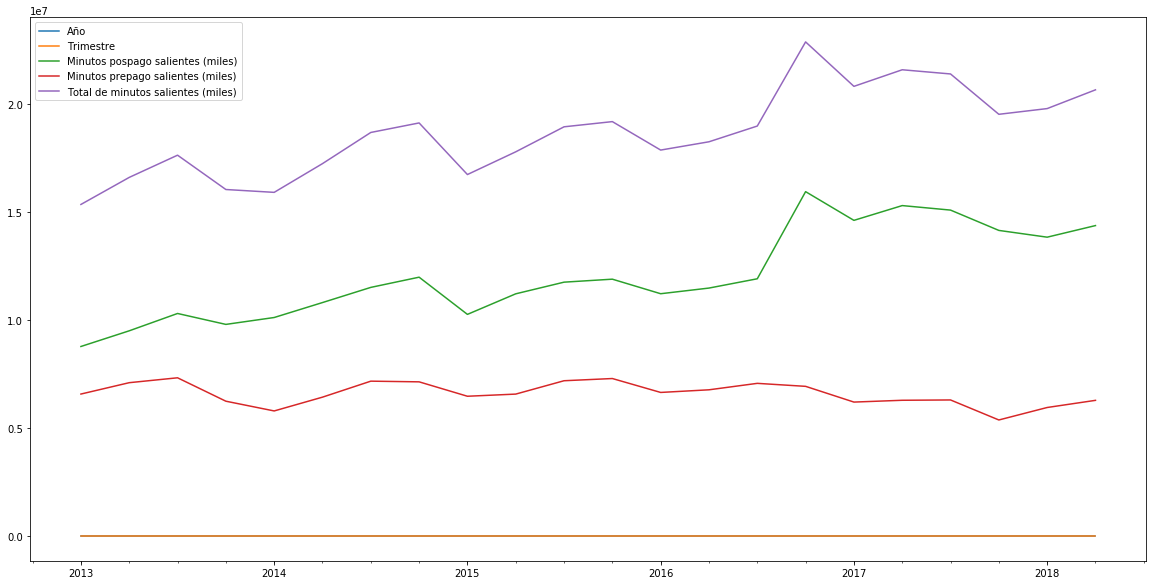

In [7]:
data.plot(figsize=(20,10))

In [8]:
data.describe()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles)
count,22.000000,22.000000,2.200000e+01,2.200000e+01,2.200000e+01
mean,2015.272727,2.409091,1.209691e+07,6.604273e+06,1.870118e+07
std,1.638287,1.140555,2.077349e+06,5.251805e+05,1.990543e+06
min,2013.000000,1.000000,8.785943e+06,5.380710e+06,1.536806e+07
25%,2014.000000,1.250000,1.044198e+07,6.291007e+06,1.735731e+07
50%,2015.000000,2.000000,1.164553e+07,6.580968e+06,1.883452e+07
75%,2016.750000,3.000000,1.408623e+07,7.100940e+06,1.974379e+07
max,2018.000000,4.000000,1.596076e+07,7.335154e+06,2.289966e+07


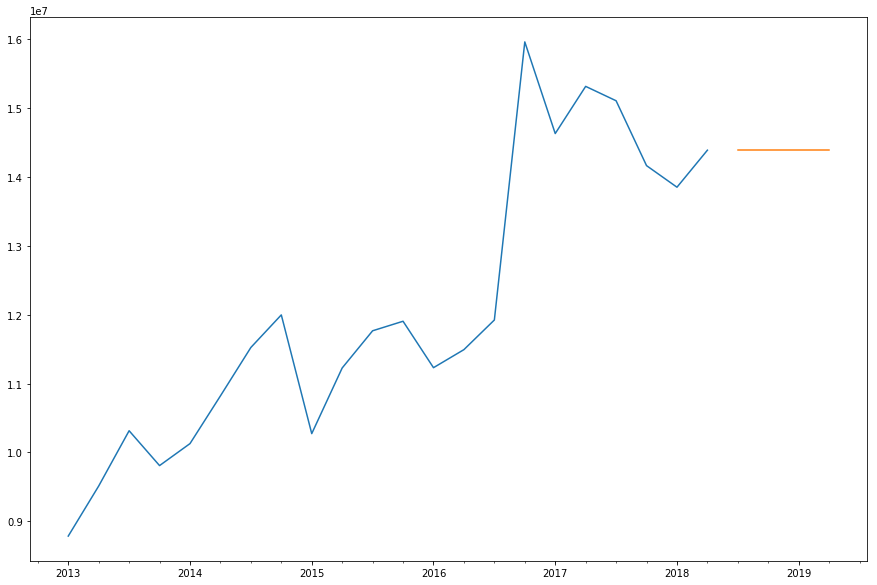

In [19]:
# Veremos random walk para predecir los minutos pospagos salientes
y = data['Minutos pospago salientes (miles)']
h = 4
test=pd.period_range(start=y.index[-1]+1, periods=h, freq='Q')
pred=pd.Series(np.repeat(y.iloc[-1], h), index=test) 
y.plot(figsize=(15,10))
pred.plot()
plt.show()

Period('2013Q1', 'Q-DEC')

In [59]:
model = sm.tsa.SimpleExpSmoothing(y).fit()
fitted = model.fittedvalues
alpha = model.model.params['smoothing_level']
rmse_ses = sm.tools.eval_measures.rmse(y,fitted)
#aic_ses = model.aic
#bic_ses = model.bic
print("El valor de alpha es: " + str(alpha))
print("RMSE: "+str(rmse_ses))

El valor de alpha es: 0.7899114221752136
RMSE: 1095041.2496960515


In [53]:
print(model.model.params)

{'smoothing_level': 0.7899114221752136, 'smoothing_slope': nan, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 8785944.949560553, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


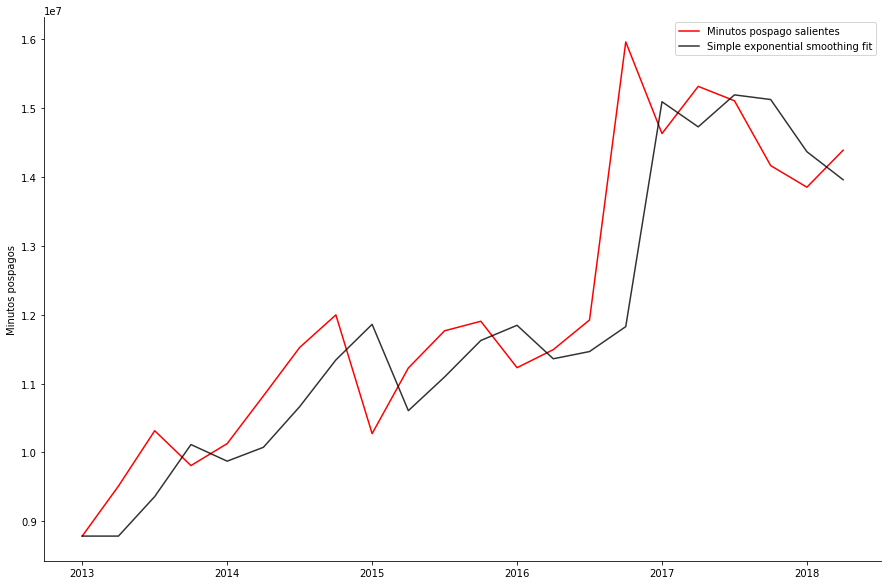

In [54]:
fig, ax= plt.subplots(figsize=(15,10))
y.plot(color='red', label='Minutos pospago salientes')
fitted.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel('Minutos pospagos')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

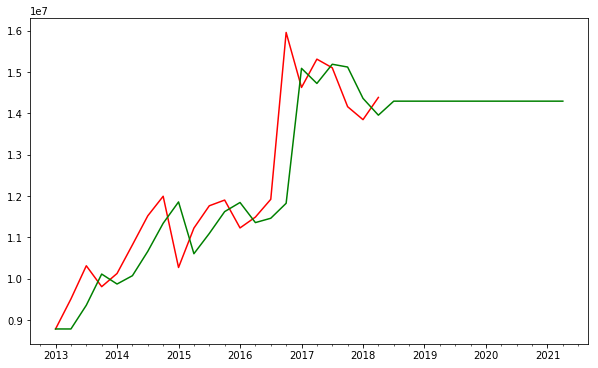

In [71]:
# Ahora para predecir, utilizare expanding windows
h=12
w=h*10
model = sm.tsa.SimpleExpSmoothing
data = y
pred_index = y.index[-1] + np.array(range(1,h+1))
pred_expanding = pd.Series(0,index=pred_index)
orig_fit = None
for i in range(0,h):
    current = pd.concat([data, pred_expanding.head(i)])
    expanding = model(current).fit(smoothing_level=0.7899114221752136)
    if i==0:
        orig_fit = expanding.fittedvalues
    pred_expanding.update(expanding.forecast(1))
ax = data[-w:].plot(color='red',figsize=(10,6))
pd.concat([orig_fit[-w:],pred_expanding]).plot(ax=ax,color='green');




Lo primero que se puede ver es que random walk es una pésima idea, ya que no tiene en cuenta ningun factor de ruido, tendencia o estacionalidad. Algo no tan diferente sucede con exponential smoothing, que a pesar de que parece tener en cuenta un poco la tendencia, a muy corto plazo el resultado se estanca muy similarmente a random walk. Aparte puede verse como exponential smoothing va como replicando suavemente la función original. En definitiva, personalmente creo que ambos modelos son malos, excepto en el caso en que la función sea muy estable alrededor de un valor dado, cosa que no es este caso.